In [1]:
!pip install sqlparse anytree graphviz pydot


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sqlparse
from anytree import Node, RenderTree
from IPython.display import display


In [3]:
def build_sql_ast(sql_query):
    """
    Builds a simplified AST tree for an SQL query.
    """
    # Parse the SQL using sqlparse
    parsed = sqlparse.parse(sql_query)[0]
    root = Node("SQL_QUERY")

    current_parent = root

    # Go through each token
    for token in parsed.tokens:
        # Skip spaces and punctuation
        if token.is_whitespace or token.ttype is sqlparse.tokens.Punctuation:
            continue
        
        # Each keyword (SELECT, FROM, WHERE) is treated as a branch
        if token.ttype is sqlparse.tokens.Keyword:
            clause_node = Node(token.value.upper(), parent=root)
            current_parent = clause_node
        
        # Other identifiers (table names, columns, etc.)
        else:
            Node(str(token).strip(), parent=current_parent)
    
    return root


In [4]:
sql_query = "SELECT name, age FROM students WHERE age > 20;"
ast_tree = build_sql_ast(sql_query)

for pre, _, node in RenderTree(ast_tree):
    print("%s%s" % (pre, node.name))


SQL_QUERY
├── SELECT
├── name, age
└── FROM
    ├── students
    └── WHERE age > 20;


In [2]:
from anytree import Node, RenderTree
from anytree.exporter import DotExporter

# Example SQL query
sql_query = "SELECT name FROM students WHERE marks > 90"

# ✅ Create a manual AST-like structure
ast_tree = Node("SQL_QUERY")
select_node = Node("SELECT", parent=ast_tree)
column_node = Node("name", parent=select_node)
from_node = Node("FROM", parent=ast_tree)
table_node = Node("students", parent=from_node)
where_node = Node("WHERE", parent=ast_tree)
condition_node = Node("marks > 90", parent=where_node)

# Print structure
for pre, fill, node in RenderTree(ast_tree):
    print(f"{pre}{node.name}")


SQL_QUERY
├── SELECT
│   └── name
├── FROM
│   └── students
└── WHERE
    └── marks > 90


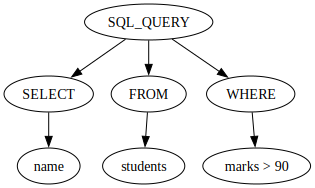

In [3]:
# Export to Graphviz DOT format
DotExporter(ast_tree).to_dotfile("sql_ast.dot")

# Render and view it
from graphviz import Source
Source.from_file("sql_ast.dot")
